In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, mannwhitneyu 

In [2]:
df = pd.read_csv('ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
control = df[df['slot'] == 'control']
exp = df[df['slot'] == 'exp']

### 1

In [4]:
control_n_clicks = sum(control['n_clicks'])
exp_n_clicks = sum(exp['n_clicks'])
round((exp_n_clicks - control_n_clicks) * 100 / control_n_clicks, 3)

1.614

### 2

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [6]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [7]:
np.random.seed(0)

control_n_clicks_median = list(map(np.median, get_bootstrap_samples(control['n_clicks'].values, 1000)))
exp_n_clicks_median = list(map(np.median, get_bootstrap_samples(exp['n_clicks'].values, 1000)))
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(exp_n_clicks_median, control_n_clicks_median)))

print('95% доверительный интервал для разности медиа:', stat_intervals(delta_median_scores, 0.05))

95% доверительный интервал для разности медиа: [1. 1.]


In [9]:
np.random.seed(0)

control_n_clicks_mean = list(map(np.mean, get_bootstrap_samples(control['n_clicks'].values, 1000)))
exp_n_clicks_mean = list(map(np.mean, get_bootstrap_samples(exp['n_clicks'].values, 1000)))
delta_mean_scores = list(map(lambda x: x[0] - x[1], zip(exp_n_clicks_mean, control_n_clicks_mean)))

print('95% доверительный интервал для разности средних:', stat_intervals(delta_mean_scores, 0.05))

95% доверительный интервал для разности средних: [0.18536146 0.40808575]


### 4

In [23]:
np.random.seed(0)
n_boot_samples = 500
control_boot_mean = list(map(np.mean, get_bootstrap_samples(control['n_clicks'].values, n_boot_samples)))
control_boot_chi_squared = list(map(lambda sample: sum((sample - np.mean(sample))**2), 
                                    get_bootstrap_samples(control['n_clicks'].values, n_boot_samples)))

0.9979748364604202


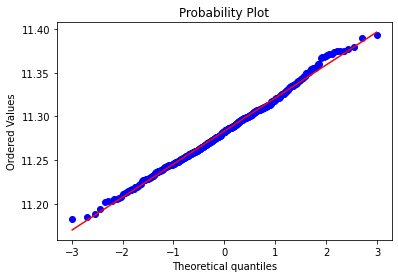

In [32]:
(osm, osr), (slope, intercept, r) = probplot(control_boot_mean, plot=plt)
print(r)

0.9976502680020735


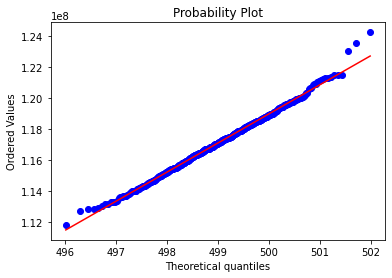

In [33]:
(osm, osr), (slope, intercept, r) = probplot(control_boot_chi_squared, sparams=n_boot_samples-1, plot=plt)
print(r)

### 5

In [44]:
control = df[df['slot'] == 'control'].groupby(by='userID')['n_clicks'].agg('sum')
exp = df[df['slot'] == 'exp'].groupby(by='userID')['n_clicks'].agg('sum')

In [45]:
mannwhitneyu(control, exp)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

### 6

In [66]:
alpha = 0.05 / 6
n_stat_insign = 0
print('alpha: ', alpha)
for browser_i in df['browser'].unique():
    control_browser_i = df.loc[(df['slot'] == 'control') & (df['browser'] == browser_i), 'n_clicks']
    exp_browser_i = df.loc[(df['slot'] == 'exp') & (df['browser'] == browser_i), 'n_clicks']
    statistic, pvalue = mannwhitneyu(control_browser_i, exp_browser_i)
    if pvalue >= alpha:
        n_stat_insign += 1
    print(f'{browser_i}: {pvalue}')
print(n_stat_insign)

alpha:  0.008333333333333333
Browser #2: 0.0272438604197241
Browser #4: 0.40760617658454984
Browser #14: 0.0
Browser #17: 0.03740060143010802
Browser #20: 0.45366656388735377
Browser #22: 0.2574055152210032
5


### 7

In [67]:
control = df[df['slot'] == 'control']
exp = df[df['slot'] == 'exp']

In [69]:
for browser_i in df['browser'].unique():
    control_browser_i = control[control['browser'] == browser_i]
    exp_browser_i = exp[exp['browser'] == browser_i]
    control_ratio_no_clicks = sum(control_browser_i['n_nonclk_queries']) * 100 / sum(control_browser_i['n_queries'])
    exp_ratio_no_clicks = sum(exp_browser_i['n_nonclk_queries']) * 100 / sum(exp_browser_i['n_queries'])
    print(browser_i)
    print(f'control: {control_ratio_no_clicks}, exp: {exp_ratio_no_clicks}')

Browser #2
control: 45.96274717919465, exp: 44.982746948554706
Browser #4
control: 46.97092963514274, exp: 45.14294190358467
Browser #14
control: 57.59041136008114, exp: 43.755617361273295
Browser #17
control: 36.29936674628209, exp: 36.93741284866483
Browser #20
control: 40.540484743383296, exp: 38.97737648371716
Browser #22
control: 40.593976593513354, exp: 39.85394721969546
